In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

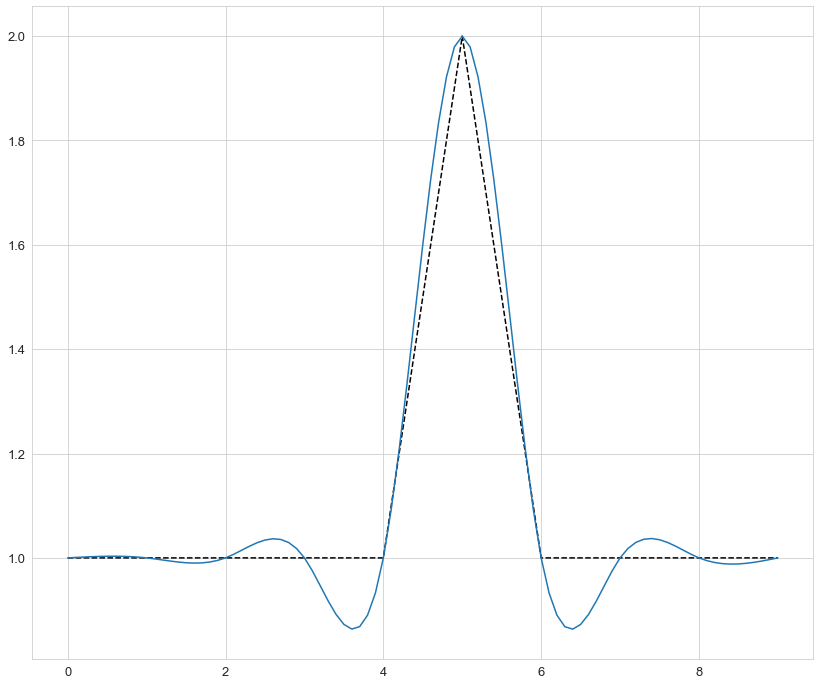

In [109]:
def koefSplain(h, u, d, Deriv,n, boundary):
    A = []
    for i in range(0,n):
        A.append([])
        for j in range(0,n):
            A[i].append(0)
    if (n >= 4):
        for i in range(2, n-2):
            A[i][i-1] = h[i]
            A[i][i]=2*(h[i]+h[i+1])
            A[i][i+1]=h[i]
            A[i][n-1]=u[i-1]
    A[1][2] = h[2]
    A[n-2][n-3]=h[n-2]
    A[1][1] = 2*(h[1]+h[2])
    A[n-2][n-2]=2*(h[n-3]+h[n-2])
    A[1][n-1]=u[0]
    A[n-2][n-1]=u[n-3]
    
    if(boundary == 2):
        A[1][1] = 1.5*h[1] + 2*h[2]
        A[1][n-1]=u[0]-3*(d[0]-Deriv[0])
    elif(boundary == 3):
        A[n-2][n-2]=2*h[n-3]+1.5*h[n-2]
        A[n-2][n-1]=u[n-3]-3*(Deriv[1]-d[n-2])
    elif(boundary == 4):
        A[1][1] = 1.5*h[1] + 2*h[2]
        A[1][n-1]=u[0]-3*(d[0]-Deriv[0])
        A[n-2][n-2]=2*h[n-3]+1.5*h[n-2]
        A[n-2][n-1]=u[n-3]-3*(Deriv[1]-d[n-2])
#     print("A")
#     for i in range(0,n):
#         print(A[i])
    return A

def Progon(A,n):
    alfa = []
    beta = []
    C = []
    for i in range(n - 1):
        alfa.append(-100)
        beta.append(-100)
        C.append(-100)
    C.append(-100)
    alfa[1]= -A[1][2]/A[1][1]
    beta[1]= A[1][n-1]/A[1][1]
    if (n >= 4):
        for i in range(2, n-2):
            alfa[i]=-A[i][i+1]/(A[i][i-1]*alfa[i-1]+A[i][i])
            beta[i]=(A[i][n-1]-A[i][i-1]*beta[i-1])/(A[i][i-1]*alfa[i-1]+A[i][i])
            
    C[n-2]=(A[n-2][n-1]-A[n-2][n-3]*beta[n-3])/(A[n-2][n-3]*alfa[n-3]+A[n-2][n-2])
    for i in range(n-3,0, -1):
        C[i]=alfa[i]*C[i+1]+beta[i]
    return C
    
def Splain(x,y, Deriv, boundary = 1):
    h = []
    for i in range(len(x)-1):
        h.append(x[i+1]-x[i])
#     print(h)
    
    d = []
    for i in range(len(y)-1):
        d.append((y[i+1]-y[i])/h[i]);
#     print(d)
    
    u = []
    for i in range(len(d)-1):
        u.append(6*(d[i+1]-d[i]));
#     print(u)
    
    C1=Progon(koefSplain(h, u, d, Deriv,len(x), boundary),len(x))
    n = len(x);
    C = C1
    C[0]=0;
    C[n-1]=0;
    
    if(boundary == 4):
        C[0]=3*(d[0]-Deriv[0])/h[0]-C1[1]/2
        C[n-1]=3*(Deriv[1]-d[n-2])/h[n-2]-C1[n-2]/2
    elif(boundary == 3):
        C[n-1]=3*(Deriv[1]-d[n-2])/h[n-2]-C1[n-2]/2
    elif(boundary == 2):
        C[0]=3*(d[0]-Deriv[0])/h[0]-C1[1]/2
    # матрица коэффициентов
    g = []
    for i in range(n-1):
        g.append([])
        for j in range(4):
            g[i].append([-100])
            
    for i in range(len(x)-1):
        g[i][0]=(C[i+1]-C[i])/(6*h[i])
        g[i][1]=C[i]/2
        g[i][2]=d[i]-h[i]*(2*C[i]+C[i+1])/6
        g[i][3]=y[i]
#     print("g")
#     for i in range(n-1):
#         print(g[i])
    new_all_x = np.array([])
    new_all_y = np.array([])
    for i in range(n-1):
        new_x = np.arange(x[i], x[i+1]+0.1, 0.1)
        new_y = np.polyval(g[i][:], new_x-x[i])
        new_all_x = np.hstack([new_all_x, new_x])
        new_all_y = np.hstack([new_all_y, new_y])
    plt.plot(new_all_x, new_all_y)
    

a = -2
b = 2
n = 5
x = np.linspace(a, b, n)
y = x ** 3
x = [i for i in range(10)]
y = [1 for i in range(9)]
y.insert(5, 2)

A = 10
B = 10
plt.plot(x, y, color='black', linestyle='dashed')
# plt.ylim(0, 2)
Splain(x, y,[A,B],1)